In [357]:
pip install pySankey

Note: you may need to restart the kernel to use updated packages.


In [420]:
import math
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.optimize import minimize, LinearConstraint, BFGS, Bounds
from scipy import optimize
import matplotlib.colors as pltcolors
from scipy.stats import norm
from scipy.stats import chi2_contingency
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
from pySankey.sankey import sankey

In [421]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [422]:
import warnings
warnings.filterwarnings("ignore")

In [423]:
df = pd.read_csv('Mushroom2-Dataset.csv')

In [424]:
mapping_dict = {
    "cap-shape" : {
        "b": "bell","c": "conical","x": "convex","f": "flat","s": "sunken",
        "p": "spherical","o": "others"
    },
    "cap-surface" : {
        "i": "fibrous","g": "grooves","y": "scaly","s": "smooth","h": "shiny",
        "l": "leathery","k": "stilky","t": "sticky","w": "wrinkled","e": "flashy",
        "f": "none"
    },
    "gill-attachment" : {
        "a": "adnate","x": "decurrent","d": "decurrent","e": "free","s": "sinuate",
        "p": "pores","f": "none"
    },
    "gill-spacing": {
        "c": "close","d": "distant","f": "none"
    },
    "stem-root": {
        "b": "bulbous","s": "swollen","c": "club","u": "cup","e": "equal","z": 
        "rhizomorphs","r": "rooted"
    },
    "stem-surface" : {
        "i": "fibrous","g": "grooves","y": "scaly","s": "smooth","h": "shiny","l": 
        "leathery","k": "stilky","t": "sticky","w": "wrinkled","e": "flashy","f": "none"
    },
    "ring-type": {
        "c": "cobwebby","c": "evanescent","r": "flaring","g": "grooved","l": "large","p": 
        "pendant","s": "sheathing","z": "zone","y": "scaly","m": "movable","f": "none",
    },
    "habitat": {
        "g": "grasses","l": "leaves","m": "meadows","p": "paths","h": "heaths","u": "urban",
        "w": "waste","d": "woods",
    },
    "season": {
        "s": "spring","u": "summer","a": "autumn","w": "winter"
    }
}

for col in mapping_dict.keys():
    df = df.replace({col: mapping_dict[col]})

In [425]:
# color mapping
#brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l
colors = {"b": "buff","n": "brown","g": "gray","r": "green",
          "p": "pink","u": "purple","e": "red","w": "white",
          "y": "yellow","l": "blue","k": "black","f": "none",
          "o": "orange"}
color_cols = ['cap-color', 'gill-color', 'gill-color', 'stem-color', 'veil-color', 'spore-print-color']
for col in color_cols:
    df = df.replace({col: colors})

In [426]:
df.columns = df.columns.str.replace('-', '_')

In [427]:
na_count=round((df.isnull().sum()/len(df))*100, 2)
na_count

class                    0.00
cap_diameter             0.00
cap_shape                0.00
cap_surface             23.12
cap_color                0.00
does_bruise_or_bleed     0.00
gill_attachment         16.18
gill_spacing            41.04
gill_color               0.00
stem_height              0.00
stem_width               0.00
stem_root               84.39
stem_surface            62.43
stem_color               0.00
veil_type               94.80
veil_color              87.86
has_ring                 0.00
ring_type                4.05
spore_print_color       89.60
habitat                  0.00
season                   0.00
dtype: float64

In [428]:
#Drop the variables which have more than 80% missing values
x=pd.DataFrame(data=na_count,columns=["Missing Values"]).reset_index()
x.rename(columns={"index":"Column"}, inplace=True)
y=x[x["Missing Values"]>60]
df1=df.drop(y["Column"],axis=1)

In [429]:
##imputing "Unknown" class to all the remaining null values
df2 = df1.fillna("Unknown")
df2.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season
0,p,15.26,convex,grooves,orange,f,free,Unknown,white,16.95,17.09,white,t,grooved,woods,winter
1,p,16.60,convex,grooves,orange,f,free,Unknown,white,17.99,18.19,white,t,grooved,woods,summer
2,p,14.07,convex,grooves,orange,f,free,Unknown,white,17.80,17.74,white,t,grooved,woods,winter
3,p,14.17,flat,shiny,red,f,free,Unknown,white,15.77,15.98,white,t,pendant,woods,winter
4,p,14.64,convex,shiny,orange,f,free,Unknown,white,16.53,17.20,white,t,pendant,woods,winter


In [430]:
df2.describe()

,cap_diameter,stem_height,stem_width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


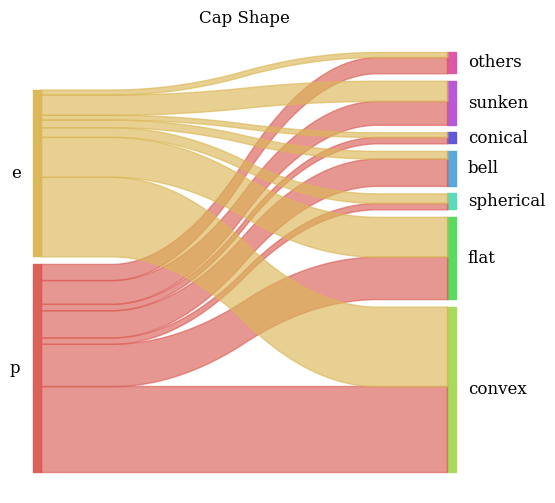

In [448]:
sankey(
    left=df2['class'], right=df2['cap_shape'],
    fontsize=12,)
plt.gcf().set_size_inches((6,6))
plt.title('Cap Shape')
plt.show()

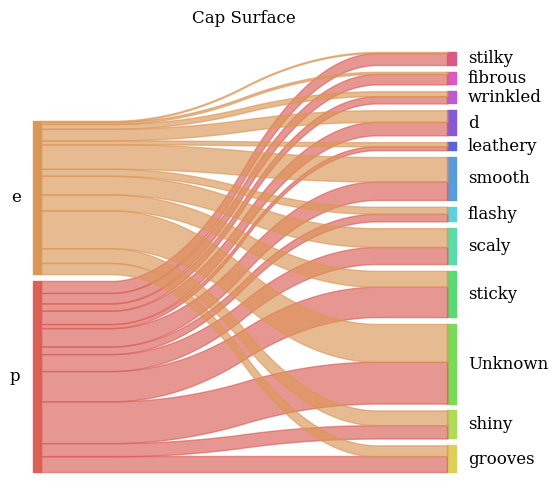

In [447]:
sankey(
    left=df2['class'], right=df2['cap_surface'],
    fontsize=12,)
plt.gcf().set_size_inches((6,6))
plt.title('Cap Surface')
plt.show()

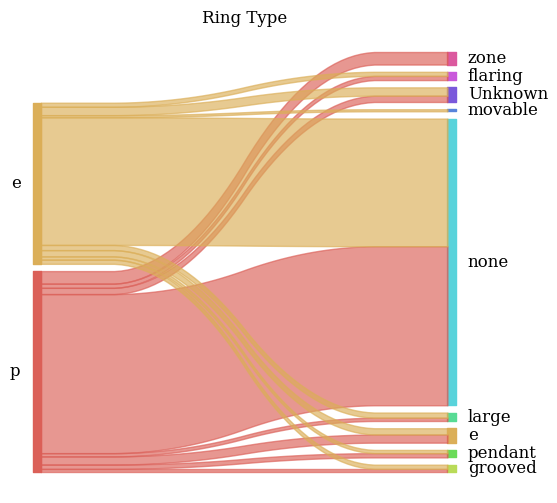

In [445]:
sankey(
    left=df2['class'], right=df2['ring_type'],
    fontsize=12,)
plt.gcf().set_size_inches((6,6))
plt.title('Ring Type')
plt.show()

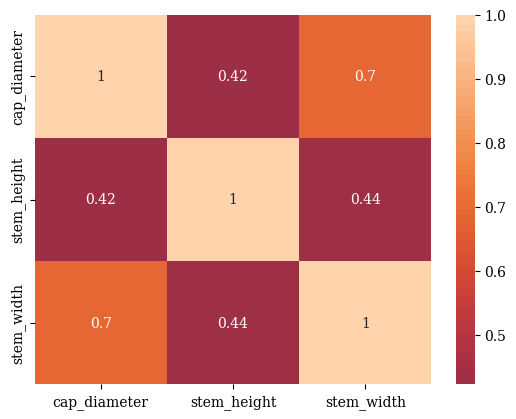

In [437]:
# Finding Correlation between between numerical variables through Heatmap
corr = df2.corr()
sns.heatmap(corr, annot=True, center=0)
plt.show()
#fig, ax = plt.subplots()
#fig.set_size_inches(10, 8)
#sns.heatmap(corr, annot = True, center=0, ax = ax)

In [438]:
data= df2.drop(['cap_diameter','stem_height','stem_width'], axis=1)

In [467]:
# get the list of column names in the dataframe
columns = data.columns.tolist()

# loop over all pairs of columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        
        # create a contingency table of the two variables
        contingency_table = pd.crosstab(data[columns[i]], data[columns[j]])
        
        # perform the chi-square test and print the p-value
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        #if p>0.05:
        print(f"Chi-square test between {columns[i]} and {columns[j]}: p-value = {p}")
        #else:
           # print(f"Keep the variables {columns[i]} and {columns[j]}")

Chi-square test between class and cap_shape: p-value = 0.0
Chi-square test between class and cap_surface: p-value = 0.0
Chi-square test between class and cap_color: p-value = 0.0
Chi-square test between class and does_bruise_or_bleed: p-value = 9.381208881872168e-07
Chi-square test between class and gill_attachment: p-value = 0.0
Chi-square test between class and gill_spacing: p-value = 4.645795288240711e-173
Chi-square test between class and gill_color: p-value = 0.0
Chi-square test between class and stem_color: p-value = 0.0
Chi-square test between class and has_ring: p-value = 7.427498993566696e-46
Chi-square test between class and ring_type: p-value = 0.0
Chi-square test between class and habitat: p-value = 0.0
Chi-square test between class and season: p-value = 4.0178666316236727e-181
Chi-square test between cap_shape and cap_surface: p-value = 0.0
Chi-square test between cap_shape and cap_color: p-value = 0.0
Chi-square test between cap_shape and does_bruise_or_bleed: p-value = 0

For Nomminal variables, p-value is less than level of significance of 0.05, so we reject the null hypothesis and conclude that there is evidence of a relationship between the two variables. In this case, we want to keep the variables in your analysis.
However in case of Numerical Variables, we can see high correlation between stem height and cap diameter, we plan to drop cap diameter

In [441]:
df3= df2.drop("cap_diameter", axis=1)

In [442]:
df3.head()

,class,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season
0,p,convex,grooves,orange,f,free,Unknown,white,16.95,17.09,white,t,grooved,woods,winter
1,p,convex,grooves,orange,f,free,Unknown,white,17.99,18.19,white,t,grooved,woods,summer
2,p,convex,grooves,orange,f,free,Unknown,white,17.80,17.74,white,t,grooved,woods,winter
3,p,flat,shiny,red,f,free,Unknown,white,15.77,15.98,white,t,pendant,woods,winter
4,p,convex,shiny,orange,f,free,Unknown,white,16.53,17.20,white,t,pendant,woods,winter


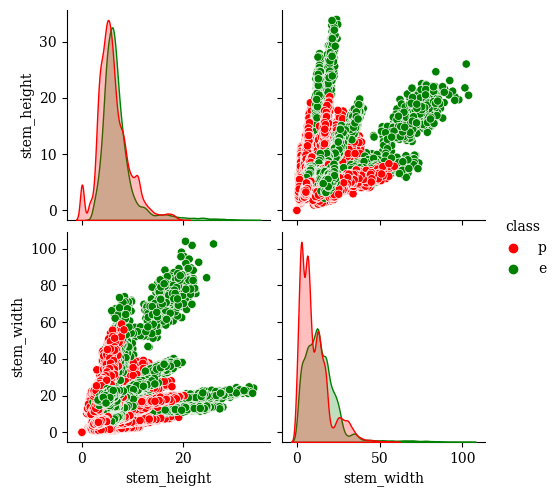

In [443]:
import seaborn as sns
sns.pairplot(df3, hue='class', palette={'p': 'red', 'e': 'green'})

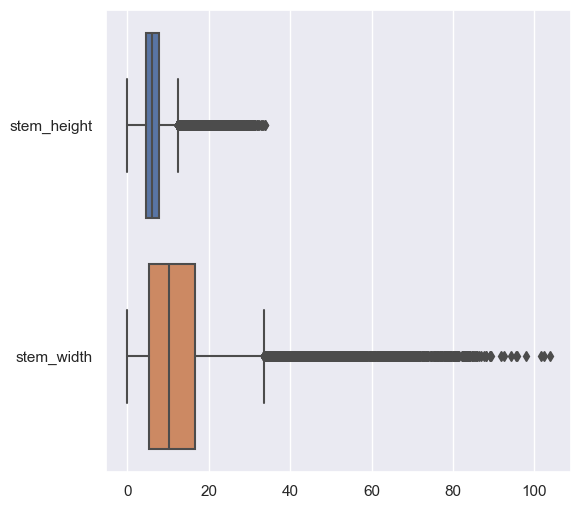

In [457]:
sns.boxplot(data=df3[["stem_height", "stem_width"]], orient="h")
sns.set(rc={"figure.figsize":(8, 8)}) #width=3, #height=4
plt.show()

In [458]:
#Target Class: To check if dataset is imbalanced
target_class = df3["class"].value_counts()
target_class

p    33888
e    27181
Name: class, dtype: int64

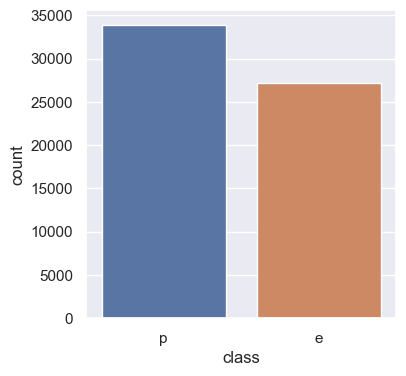

In [461]:
sns.countplot(data=df3, x='class')
sns.set(rc={"figure.figsize":(6, 4)})
plt.show()

In [462]:
#One-Hot Encoding
cat_var= ['cap_shape', 'cap_surface', 'cap_color', 'does_bruise_or_bleed',
            'gill_attachment', 'gill_spacing', 'gill_color', 'stem_color',
            'has_ring', 'ring_type', 'habitat', 'season']

df4 = pd.get_dummies(df3, columns=cat_var, drop_first=True)

In [463]:
df4.head()

,class,stem_height,stem_width,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_others,cap_shape_spherical,cap_shape_sunken,cap_surface_d,...,habitat_heaths,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_spring,season_summer,season_winter
0,p,16.95,17.09,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,p,17.99,18.19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,p,17.80,17.74,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,p,15.77,15.98,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,p,16.53,17.20,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [464]:
# create X and y matrices
X = df4.drop('class', axis=1).values # drop the 'class' column and convert to numpy array
y = np.where(df4['class'] == 'p', 1, 0) # create a binary target variable (1 for poisonous, 0 for edible)

print(X.shape)
print(y.shape)

(61069, 82)
(61069,)


In [489]:
class LogisticRegression:
    def __init__(self, X, y, learningRate, tolerance, maxIteration, 
                 gd,stochastic_gd, regularization, ridge_lambda, lasso):
        self.tolerance = tolerance
        self.learningRate = learningRate
        self.maxIteration = maxIteration
        self.X= X
        self.y= y
        self.w = None
        self.gd = gd
        self.stochastic_gd = stochastic_gd
        self.regularization= regularization
        self.ridge_lambda = ridge_lambda
        self.lasso=lasso
        
        
    def splitData(self):
        X_Train, X_Test, y_Train, y_Test = train_test_split(self.X,self.y,test_size=0.3,random_state=0,shuffle=True)
        return X_Train, X_Test, y_Train, y_Test

    def sigmoid(self, z):
        sig = 1/(1+np.exp(-z))
        return sig

    def costFunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        # approach1
        cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
        cost = -cost/X.shape[0]
        return cost

    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        gradient = (sig-y).dot(X)
        return gradient
    
    def gradientDescent(self, X, y):
        errors = []
        last_error = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_error = self.costFunction(X, y)
            diff = last_error - current_error
            last_error = current_error
            errors.append(current_error)

            if np.abs(diff) < self.tolerance:
                print('model stopped learning')
                break
    
    ## COST FUNCTION WITH REGULARIZATION - RIDGE REGRESSION
    def costFunctionWithRegularization(self,X,y):
        return self.costFunction(X, y) + (self.ridge_lambda*np.sum(self.w**2))/2

    ## COST FUNCTION DERIVATIVE WITH REGULARIZATION- RIDGE REGRESSION
    def l2_gradient(self,X,y):
        gradient_with_l2 = self.gradient(X,y)+ self.ridge_lambda*self.w
        return gradient_with_l2

    ## GRADIENT DESCENT WITH REGULARIZATION- RIDGE REGRESSION
    def gradientWithRegularization(self,X_Train,y_Train):
        errors = []
        error_prev = np.inf
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - (self.learningRate * self.l2_gradient(X_Train, y_Train))
            current_error = self.costFunctionWithRegularization(X_Train,y_Train)
            error_diff= np.abs(error_prev - current_error)
            error_prev = current_error
            errors.append(current_error)
            if error_diff < self.tolerance:
                print('Model stopped running')
                break
    
    ## COST FUNCTION DERIVATIVE WITH REGULARIZATION - LASSO REGRESSION
    def costFunctionWithRegularizationLasso(self,X,y):
        return self.costFunction(X,y) + (self.ridge_lambda*np.sum(abs(self.w)))
    
    def l1_gradient(self,X,y):
        gradient_with_l1 = self.gradient(X,y)+ np.sign(self.w)
        return gradient_with_l1
        #y_hat = self.predict(X)
        #return (y_hat - y).dot(X) + geek.sign(self.w)
    
    ## GRADIENT DESCENT WITH REGULARIZATION - LASSO REGRESSION
    def gradientWithRegularizationLasso(self,X_Train,y_Train):
        errors = []
        error_prev = np.inf
        for i in tqdm(range(self.maxIteration)):
            #gradient = self.costDerivativeWithRegularizationLasso(X_Train,y_Train)
            self.w = self.w - (self.learningRate * self.l1_gradient(X_Train, y_Train))
            current_error = self.costFunctionWithRegularizationLasso(X_Train,y_Train)
            error_diff= error_prev - current_error
            error_prev = current_error
            errors.append(current_error)
            if np.abs(error_diff) < self.tolerance:
                print('Model stopped running')
                break
    
    #STOCHASTIC GRADIENT DESCENT
    def stochasticGradientDescent(self, X_Train, y_Train):
        
        errors = []
        last_error = float('inf')
        for i in tqdm(range(self.maxIteration)):
            X_Gradient_Sample, _, y_Gradient_Sample ,__  = train_test_split(X_Train,y_Train,test_size=0.80,shuffle=True)
            self.w = self.w - self.learningRate * self.gradient(X_Gradient_Sample,y_Gradient_Sample)
            current_error = self.costFunction(X_Gradient_Sample,y_Gradient_Sample)
            diff = last_error - current_error
            last_error = current_error
            errors.append(current_error)

            if np.abs(diff) < self.tolerance:
                print('model stopped learning')
                break
        

    ## STOCHASTIC GRADIENT DESCENT WITH REGULARIZATION
    def stochasticGradientWithRegularization(self,X_Train,y_Train):
        errors = []
        error_prev = np.inf
        for i in tqdm(range(self.maxIteration)):
            X_Gradient_Sample, _, y_Gradient_Sample ,__  = train_test_split(X_Train,y_Train,test_size=0.80,shuffle=True)
            #gradient = self.costDerivativeWithRegularization(X_Gradient_Sample,y_Gradient_Sample)
            self.w = self.w - (self.learningRate * self.l2_gradient(X_Gradient_Sample,y_Gradient_Sample))
            current_error = self.costFunctionWithRegularization(X_Gradient_Sample,y_Gradient_Sample)
            error_diff= error_prev - current_error
            error_prev = current_error
            errors.append(current_error)
            if np.abs(error_diff) < self.tolerance:
                print('Model stopped running')
                break
                
    
    ## STOCHASTIC GRADIENT DESCENT WITH REGULARIZATION
    def stochasticGradientWithRegularizationLasso(self,X_Train,y_Train):
        errors = []
        error_prev = np.inf
        for i in tqdm(range(self.maxIteration)):
            X_Gradient_Sample, _, y_Gradient_Sample ,__  = train_test_split(X_Train,y_Train,test_size=0.80,shuffle=True)
            #gradient = self.costDerivativeWithRegularizationLasso(X_Gradient_Sample,y_Gradient_Sample)
            self.w = self.w - (self.learningRate * self.l1_gradient(X_Gradient_Sample,y_Gradient_Sample))
            current_error = self.costFunctionWithRegularizationLasso(X_Gradient_Sample,y_Gradient_Sample)
            error_diff= error_prev - current_error
            error_prev = current_error
            errors.append(current_error)
            if np.abs(error_diff) < self.tolerance:
                print('Model stopped running')
                break
    

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)   
    
    def evaluate(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat == 1)        
        correct_predictions = (y == y_hat).sum()
        total_predictions = len(y)
        accuracy = correct_predictions / total_predictions
        recall = (y & y_hat).sum()/y.sum()
        precision = (y & y_hat).sum()/y_hat.sum()
        f_score = 2*(precision*recall)/(precision+recall)
        
        return accuracy, f_score, recall, precision
    
    
    def fit(self):
        X_train,X_test,y_train,y_test = self.splitData()
        print('Solving using Gradient Descent')
        
        if self.gd and not self.regularization and not self.lasso:
            print('Solved using gradient descent without regularization')
            self.w = np.ones(X_train.shape[1])
            self.gradientDescent(X_train,y_train)
            
        elif self.gd and self.regularization and not self.lasso:
            print('Solved using gradient descent with regularization- RIDGE REGRESSION')
            self.w = np.ones(X_train.shape[1])
            self.gradientWithRegularization(X_train,y_train)
        
        elif self.gd and not self.regularization and self.lasso:
            print('Solved using gradient descent with regularization- LASSO REGRESSION')
            self.w = np.ones(X_train.shape[1])
            self.gradientWithRegularizationLasso(X_train,y_train)
        
        elif self.stochastic_gd and not self.regularization and not self.lasso:
            print('Solved using stochastic gradient descent with out regularization')
            self.w = np.ones(X_train.shape[1])
            self.stochasticGradientDescent(X_train,y_train)
        
        elif self.stochastic_gd and self.regularization and not self.lasso:
            print('Solved using stochastic gradient descent with regularization- RIDGE REGRESSION')
            self.w = np.ones(X_train.shape[1])
            self.stochasticGradientWithRegularization(X_train,y_train)
        
        elif self.stochastic_gd and not self.regularization and self.lasso:
            print('Solved using stochastic gradient descent with regularization- LASSO REGRESSION')
            self.w = np.ones(X_train.shape[1])
            self.stochasticGradientWithRegularizationLasso(X_train,y_train)
        
              
        y_train_hat = self.predict(X_train)
        accuracy, f_score, recall, precision = self.evaluate(y_train, y_train_hat)
        print('Training F1 score {}'.format(f_score))
        print('Training recall score {}'.format(recall))
        print('Training precision score {}'.format(precision))
        print('Training accuracy score {}'.format(accuracy))
        y_test_hat= self.predict(X_test)
        accuracy,f_score, recall, precision = self.evaluate(y_test, y_test_hat)
        print('Testing F1 score {}'.format(f_score))
        print('Testing recall score {}'.format(recall))
        print('Testing precision score {}'.format(precision))
        print('Testing accuracy score {}'.format(accuracy))
        
        

In [331]:
lr = LogisticRegression(X,y, learningRate = 0.001, tolerance = 0.0005, maxIteration = 2000, gd=True,stochastic_gd= False, regularization=False,lasso=False, ridge_lambda=None)

In [332]:
lr.fit()

Solving using Gradient Descent
Solved using gradient descent without regularization


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:31<00:00, 63.94it/s]

Training F1 score 0.5874868049413712
Training recall score 0.4369747899159664
Training precision score 0.8961615458264427
Training accuracy score 0.6617619537756152
Testing F1 score 0.5888961463096014
Testing recall score 0.4365678868874685
Testing precision score 0.9044943820224719
Testing accuracy score 0.6564598002292451


In [333]:
lr = LogisticRegression(X,y, learningRate = 0.001, tolerance = 0.0005, maxIteration = 10000, gd=True, stochastic_gd= False, regularization=True,lasso=False, ridge_lambda=0.001)

In [334]:
lr.fit()

Solving using Gradient Descent
Solved using gradient descent with regularization- RIDGE REGRESSION


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:32<00:00, 65.51it/s]

Training F1 score 0.556147516722903
Training recall score 0.39873525167642815
Training precision score 0.9189162754303599
Training accuracy score 0.6491999625713484
Testing F1 score 0.556036816459123
Testing recall score 0.3978307185744722
Testing precision score 0.9231460674157304
Testing accuracy score 0.641940942088314


In [335]:
lr = LogisticRegression(X,y, learningRate = 0.001, tolerance = 0.0005, maxIteration = 2000, gd=True,stochastic_gd=False, regularization=False,lasso=True, ridge_lambda=0.001)

In [336]:
lr.fit()

Solving using Gradient Descent
Solved using gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:31<00:00, 63.56it/s]

Training F1 score 0.41172974043986527
Training recall score 0.2645785586962058
Training precision score 0.9276785714285715
Training accuracy score 0.5832787498830355
Testing F1 score 0.4127008069990196
Testing recall score 0.26496223126089485
Testing precision score 0.9328332765086942
Testing accuracy score 0.5749686152502592


In [337]:
lr = LogisticRegression(X,y, learningRate = 0.001, tolerance = 0.0005, maxIteration = 2000, gd=False,stochastic_gd= True, regularization=False,lasso=False, ridge_lambda=None)

In [338]:
lr.fit()

Solving using Gradient Descent
Solved using stochastic gradient descent with out regularization


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:47<00:00, 42.15it/s]


Training F1 score 0.40846189498775076
Training recall score 0.2618198794669383
Training precision score 0.9285069235400362
Training accuracy score 0.5820155328904276
Testing F1 score 0.4095821053427039
Testing recall score 0.26244431532055007
Testing precision score 0.9322325421396629
Testing accuracy score 0.5735494787402434


In [339]:
lr = LogisticRegression(X,y, learningRate = 0.001, tolerance = 0.0005, maxIteration = 2000, gd=False,stochastic_gd= True, regularization=True,lasso=False, ridge_lambda=0.001)

In [340]:
lr.fit()

Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- RIDGE REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:47<00:00, 42.32it/s]

Training F1 score 0.4100935939411979
Training recall score 0.2631355572532043
Training precision score 0.9288389513108615
Training accuracy score 0.5827407130158136
Testing F1 score 0.41141390503510233
Testing recall score 0.26389695913228745
Testing precision score 0.9328996918863403
Testing accuracy score 0.5744227935156377


In [490]:
lr = LogisticRegression(X,y, learningRate = 0.001, tolerance = 0.0005, maxIteration = 2000, gd=False,stochastic_gd= True, regularization=False,lasso=True, ridge_lambda=0.001)

In [491]:
lr.fit()

Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:45<00:00, 44.03it/s]

Training F1 score 0.5603271983640082
Training recall score 0.40701128936423053
Training precision score 0.8989501312335958
Training accuracy score 0.6479367455787405
Testing F1 score 0.5592823190734417
Testing recall score 0.4045128801084641
Testing precision score 0.9058772500542182
Testing accuracy score 0.6406855520986846


Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:45<00:00, 43.83it/s]


Training F1 score 0.4127989444169553
Training recall score 0.2655547067311773
Training precision score 0.9265511624463202
Training accuracy score 0.5835828576775521
Testing F1 score 0.41405779650812763
Testing recall score 0.2664148750726322
Testing precision score 0.9287643484132343
Testing accuracy score 0.5750231974237214
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:45<00:00, 43.89it/s]


Training F1 score 0.5840228245363766
Training recall score 0.43438587556234615
Training precision score 0.8909296657381616
Training accuracy score 0.6589314119958829
Testing F1 score 0.5842990898972042
Testing recall score 0.43211311253147394
Testing precision score 0.9019607843137255
Testing accuracy score 0.653457780688827
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:47<00:00, 42.32it/s]


Training F1 score 0.5816089980252426
Training recall score 0.4312452253628724
Training precision score 0.8929607171104667
Training accuracy score 0.6580190886123327
Testing F1 score 0.5797120504897771
Testing recall score 0.42698043773000194
Testing precision score 0.9025588536335721
Testing accuracy score 0.6510561650564926
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:44<00:00, 45.00it/s]


Training F1 score 0.49100273020600643
Training recall score 0.33583736524912994
Training precision score 0.9126874279123414
Training accuracy score 0.6162159633199213
Testing F1 score 0.489160565782927
Testing recall score 0.3332364904125508
Testing precision score 0.9193160566390596
Testing accuracy score 0.6077179193275476
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:44<00:00, 44.87it/s]


Training F1 score 0.5373908378289768
Training recall score 0.3826075884899414
Training precision score 0.9024927420162179
Training accuracy score 0.6369186862543277
Testing F1 score 0.5366352844862874
Testing recall score 0.38088320743753634
Testing precision score 0.9078947368421053
Testing accuracy score 0.6292778778450958
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 45.72it/s]


Training F1 score 0.605881037567084
Training recall score 0.45997793056616587
Training precision score 0.8873423939741281
Training accuracy score 0.6701600074857303
Testing F1 score 0.6062395686224162
Testing recall score 0.45729227193492156
Testing precision score 0.8990860624523991
Testing accuracy score 0.6651929479831887
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 46.13it/s]


Training F1 score 0.6082229965156795
Training recall score 0.463033698327816
Training precision score 0.8860553886136604
Training accuracy score 0.6712126883129035
Testing F1 score 0.6093410108765195
Testing recall score 0.46116598876622117
Testing precision score 0.8978129713423831
Testing accuracy score 0.6667212488401288
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:44<00:00, 44.62it/s]


Training F1 score 0.38740920096852305
Training recall score 0.24446142093200918
Training precision score 0.9329446064139941
Training accuracy score 0.5738748011602882
Testing F1 score 0.3892041097991105
Testing recall score 0.24578733294596164
Testing precision score 0.9344624447717231
Testing accuracy score 0.5651984062005349
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:47<00:00, 41.97it/s]


Training F1 score 0.511778347369706
Training recall score 0.35591206179441476
Training precision score 0.9105320304017372
Training accuracy score 0.6257134836717507
Testing F1 score 0.5103766333589547
Testing recall score 0.3536703466976564
Testing precision score 0.9164366373902133
Testing accuracy score 0.6175427105507342
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:45<00:00, 44.33it/s]


Training F1 score 0.4135135135135135
Training recall score 0.2662337662337662
Training precision score 0.9254942460902921
Training accuracy score 0.5837466080284458
Testing F1 score 0.41390728476821187
Testing recall score 0.2663180321518497
Testing precision score 0.9284267386900743
Testing accuracy score 0.5749140330767971
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 45.80it/s]


Training F1 score 0.38318828847062
Training recall score 0.24106612341906458
Training precision score 0.9335963182117029
Training accuracy score 0.5722372976513521
Testing F1 score 0.38579772517675986
Testing recall score 0.2430757311640519
Testing precision score 0.9344750558451228
Testing accuracy score 0.5637792696905191
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:44<00:00, 44.83it/s]


Training F1 score 0.5761182016787397
Training recall score 0.4253034547152194
Training precision score 0.8926598966684482
Training accuracy score 0.6550481893889772
Testing F1 score 0.5761750939415914
Testing recall score 0.4232035638194848
Testing precision score 0.9023332645054718
Testing accuracy score 0.6490912068118553
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:44<00:00, 44.50it/s]

Training F1 score 0.4027251578597541
Training recall score 0.25715134538663953
Training precision score 0.9281556372549019
Training accuracy score 0.579582670534294
Testing F1 score 0.40397300780953826
Testing recall score 0.2579895409645555
Testing precision score 0.9304924903946908
Testing accuracy score 0.5709295344140604


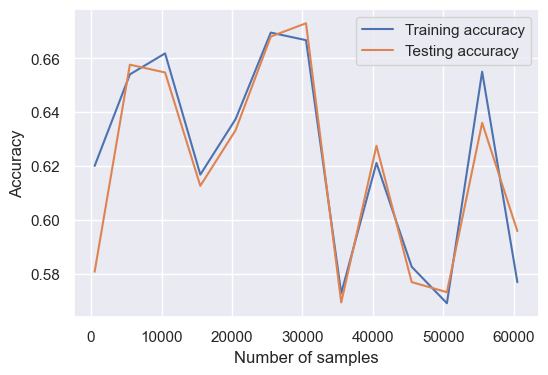

In [496]:
# Set up empty lists to store results
train_acc = []
test_acc = []
num_samples = []

# Define range of sample sizes to test
sample_sizes = range(500, len(X), 5000)

for size in sample_sizes:
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size)
    
    # Train
    lr.fit()
    
    # Calculate accuracy on training and testing sets
    train_pred = lr.predict(X_train)
    train_acc.append(accuracy_score(y_train, train_pred))
    
    test_pred = lr.predict(X_test)
    test_acc.append(accuracy_score(y_test, test_pred))
    
    # Store number of samples used in training set
    num_samples.append(size)

# Plot accuracy versus number of samples
plt.plot(num_samples, train_acc, label='Training accuracy')
plt.plot(num_samples, test_acc, label='Testing accuracy')
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.legend()

Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 46.26it/s]


Training F1 score 0.46702757463513467
Training recall score 0.31304643069348953
Training precision score 0.9191277258566978
Training accuracy score 0.6061804061008702
Testing F1 score 0.46690298777399986
Testing recall score 0.3125121053650978
Testing precision score 0.9227909636831569
Testing accuracy score 0.5977839637574368
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:46<00:00, 42.60it/s]


Training F1 score 0.5720308394213277
Training recall score 0.4203802733214498
Training precision score 0.8948414490920589
Training accuracy score 0.6532937213436886
Testing F1 score 0.5706716121340576
Testing recall score 0.4171993027309704
Testing precision score 0.9027661357921207
Testing accuracy score 0.6461983516183615
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:45<00:00, 44.08it/s]


Training F1 score 0.3994137046537193
Training recall score 0.25443510737628383
Training precision score 0.9284497444633731
Training accuracy score 0.5782492748198746
Testing F1 score 0.4002736394040742
Testing recall score 0.25498741042029827
Testing precision score 0.9303886925795053
Testing accuracy score 0.5693466513836581
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:45<00:00, 44.18it/s]


Training F1 score 0.6919572057898049
Training recall score 0.5833121127238774
Training precision score 0.8503371898781167
Training accuracy score 0.7137409937307009
Testing F1 score 0.6917954953390076
Testing recall score 0.5785396087546001
Testing precision score 0.860187185025198
Testing accuracy score 0.7094590906609901
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:46<00:00, 43.19it/s]


Training F1 score 0.4034417461213913
Training recall score 0.25770308123249297
Training precision score 0.9285823520415966
Training accuracy score 0.5799335641433517
Testing F1 score 0.4033970276008493
Testing recall score 0.25760216928142554
Testing precision score 0.9294199860237596
Testing accuracy score 0.5705474591998253
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:44<00:00, 44.50it/s]


Training F1 score 0.569593147751606
Training recall score 0.4177064765300059
Training precision score 0.8950527464532557
Training accuracy score 0.6520538972583513
Testing F1 score 0.5674832370709686
Testing recall score 0.4139066434243657
Testing precision score 0.9022588135951024
Testing accuracy score 0.6443971398941106
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:47<00:00, 42.05it/s]


Training F1 score 0.4011714979864878
Training recall score 0.2557932263814617
Training precision score 0.9293754818812645
Training accuracy score 0.5790914194816131
Testing F1 score 0.40206498633464927
Testing recall score 0.25644005423203564
Testing precision score 0.9304286718200984
Testing accuracy score 0.5701108018121281
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:50<00:00, 39.56it/s]


Training F1 score 0.4010248560875786
Training recall score 0.25575078516254984
Training precision score 0.9283623478662764
Training accuracy score 0.5789042762234491
Testing F1 score 0.40227703984819735
Testing recall score 0.2566337400736006
Testing precision score 0.9301509301509302
Testing accuracy score 0.5701653839855904
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:43<00:00, 45.77it/s]


Training F1 score 0.5763247936973461
Training recall score 0.42534589593413125
Training precision score 0.8934652759204779
Training accuracy score 0.655305511368953
Testing F1 score 0.5745973065751254
Testing recall score 0.42146039124539997
Testing precision score 0.9025300705101618
Testing accuracy score 0.6482724742099231
Solving using Gradient Descent
Solved using stochastic gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:44<00:00, 45.38it/s]


Training F1 score 0.5813940190977185
Training recall score 0.43154231389525505
Training precision score 0.8906797477224947
Training accuracy score 0.6574810517451108
Testing F1 score 0.5825739198846129
Testing recall score 0.4302730970366066
Testing precision score 0.9017657803937488
Testing accuracy score 0.6524753015665083


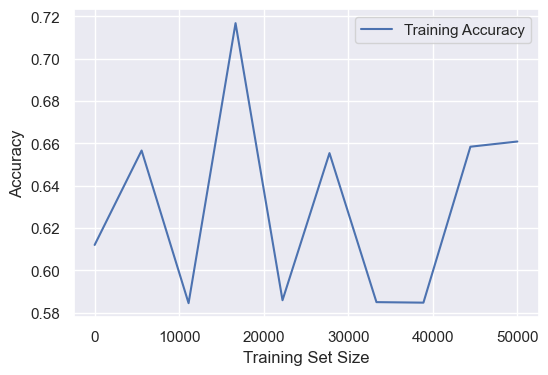

In [494]:
# Create logistic regression object
lr = LogisticRegression(X, y, learningRate=0.001, tolerance=0.0005,
                        maxIteration=2000, gd=False, stochastic_gd=True,
                        regularization=False, lasso=True, ridge_lambda=0.001)

# Create list to store accuracy values
train_accuracy = []
#test_accuracy = []

# Define range of training set sizes
training_sizes = np.linspace(0, 50000, 10)

# Loop over training set sizes
for size in training_sizes:
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)

    # Fit model to training data
    lr.fit()

    # Make predictions on training and test sets
    train_pred = lr.predict(X_train)
    test_pred = lr.predict(X_test)

    # Calculate accuracy on training and test sets
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    # Append accuracy values to lists
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# Create line plot of accuracy vs training set size
plt.plot(training_sizes, train_accuracy, label='Training Accuracy')
#plt.plot(training_sizes, test_accuracy, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [483]:
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=50, n_features= None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
        
    def _selected_features(self, X):
        n_samples = X.shape[1]
        idxs = np.random.choice(n_samples, self.n_features, replace=False)
        return X[:,idxs]

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, n_feats, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [26]:
dt = DecisionTree(max_depth=15)

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
class RandomForest:
    def __init__(self, n_trees=100, max_depth= 5, min_samples_split=2, sample_size=1000):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.trees = []
        self.sample_size = sample_size

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, self.sample_size, replace=True)
        return X[idxs, ], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [ ]:
rf = RandomForest(sample_size=5000)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_train)
accuracy_score(y_train, y_pred)